In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [12]:
file_path = "../output_file.csv"
data = pd.read_csv(file_path)

# Separate image file names and labels
image_file_names = data['name'].values
labels = data['Category'].values

# Encode categorical labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [13]:
image_data = []
for image_file in image_file_names:
    # Load, preprocess, and resize the images
    image = tf.keras.preprocessing.image.load_img('../output/tiles/' + image_file, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image /= 255.0  # Normalize pixel values

    image_data.append(image)

image_data = np.array(image_data)


In [14]:
X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

In [23]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
def showDetails(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


In [25]:
history10 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
9/9 [==============================] - 23s 2s/step - loss: 1.0760 - accuracy: 0.5551 - val_loss: 0.3966 - val_accuracy: 0.7826
Epoch 2/10
9/9 [==============================] - 21s 2s/step - loss: 0.3122 - accuracy: 0.9154 - val_loss: 0.2873 - val_accuracy: 0.8841
Epoch 3/10
9/9 [==============================] - 21s 2s/step - loss: 0.1991 - accuracy: 0.9522 - val_loss: 0.3653 - val_accuracy: 0.9130
Epoch 4/10
9/9 [==============================] - 21s 2s/step - loss: 0.1389 - accuracy: 0.9632 - val_loss: 0.5858 - val_accuracy: 0.9130
Epoch 5/10
9/9 [==============================] - 21s 2s/step - loss: 0.0972 - accuracy: 0.9816 - val_loss: 0.4453 - val_accuracy: 0.8986
Epoch 6/10
9/9 [==============================] - 21s 2s/step - loss: 0.0605 - accuracy: 0.9890 - val_loss: 0.4704 - val_accuracy: 0.9130
Epoch 7/10
9/9 [==============================] - 21s 2s/step - loss: 0.0544 - accuracy: 0.9890 - val_loss: 0.4882 - val_accuracy: 0.8841
Epoch 8/10
9/9 [==================

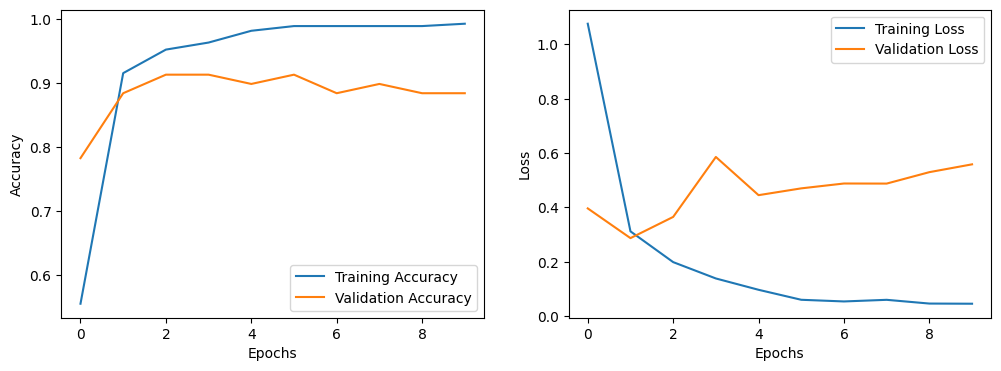

In [26]:
showDetails(history10)

In [28]:
model20 = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])
model20.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history20 = model20.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
9/9 [==============================] - 23s 2s/step - loss: 1.0965 - accuracy: 0.6434 - val_loss: 0.7165 - val_accuracy: 0.7826
Epoch 2/20
9/9 [==============================] - 21s 2s/step - loss: 0.2651 - accuracy: 0.9228 - val_loss: 0.3240 - val_accuracy: 0.8841
Epoch 3/20
9/9 [==============================] - 22s 2s/step - loss: 0.1566 - accuracy: 0.9596 - val_loss: 0.5534 - val_accuracy: 0.8406
Epoch 4/20
9/9 [==============================] - 21s 2s/step - loss: 0.1152 - accuracy: 0.9743 - val_loss: 0.4588 - val_accuracy: 0.9130
Epoch 5/20
9/9 [==============================] - 21s 2s/step - loss: 0.3356 - accuracy: 0.8824 - val_loss: 0.7053 - val_accuracy: 0.8551
Epoch 6/20
9/9 [==============================] - 22s 2s/step - loss: 0.2125 - accuracy: 0.9228 - val_loss: 1.1541 - val_accuracy: 0.8696
Epoch 7/20
9/9 [==============================] - 21s 2s/step - loss: 0.1608 - accuracy: 0.9926 - val_loss: 1.0542 - val_accuracy: 0.8986
Epoch 8/20
9/9 [==================

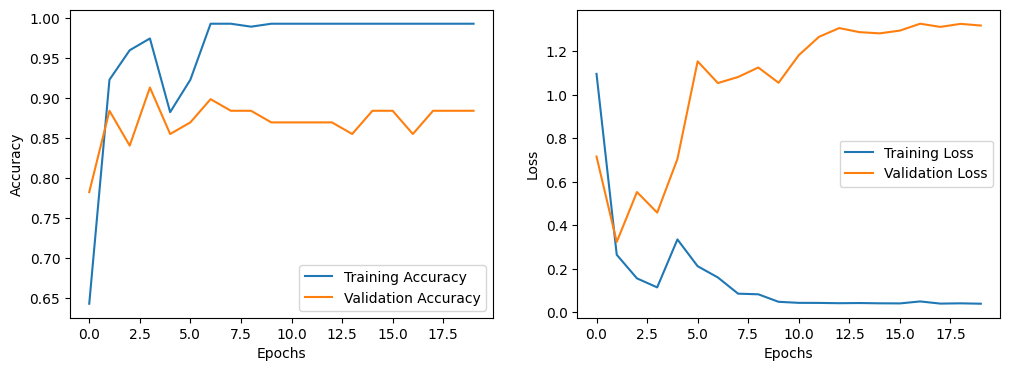

In [29]:
showDetails(history20)

In [30]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0
